In [1]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

# ignore warnings because they are distracting 
import warnings
warnings.filterwarnings('ignore')

# suppress the scientific notation when printing numpy arrays
np.set_printoptions(suppress=True)

# Loading the financial data

In [2]:
stocks = pd.read_csv("./data/StockIndices.csv",
                 decimal=',')

# stocks date format: 10/29/2018
stocks['Date'] = pd.to_datetime(stocks['Date'], format='%d/%m/%Y')
stocks.set_index('Date', inplace=True)
stocks.drop(columns='Unnamed: 0', inplace=True)
stocks.head()

,Index,Price Close
Date,,
2008-10-30,.SPX,954.09
2008-10-31,.SPX,968.75
2008-11-03,.SPX,966.3
2008-11-04,.SPX,1005.75
2008-11-05,.SPX,952.77


In [3]:
stocks['Price Close'] = [float(price) for price in stocks['Price Close']]

In [4]:
stocks.index

DatetimeIndex(['2008-10-30', '2008-10-31', '2008-11-03', '2008-11-04',
               '2008-11-05', '2008-11-06', '2008-11-07', '2008-11-10',
               '2008-11-11', '2008-11-12',
               ...
               '2018-10-17', '2018-10-18', '2018-10-19', '2018-10-22',
               '2018-10-23', '2018-10-24', '2018-10-25', '2018-10-26',
               '2018-10-29', '2018-10-30'],
              dtype='datetime64[ns]', name='Date', length=15654, freq=None)

In [5]:
date = datetime(2009,3,12)

In [6]:
# data cleansing
stocks['Index'] = [name.replace(".", "") for name in stocks['Index'].values]

In [7]:
us_stocks = stocks[stocks['Index'].isin(['SPX', 'NDX', 'IXIC'])]
swiss_stocks = stocks[stocks['Index'] == 'SSMI']
jpn_stocks = stocks[stocks['Index'] == 'N225']
UK_stocks = stocks[stocks['Index'] == 'FTSE']

# Loading the weather data

In [8]:
df = pd.read_csv("./data/Weather_ALL.csv",
                 sep=';',
                 decimal=',')

# weather date format: 10/29/2018
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.set_index('Date', inplace=True)
df.head()

,City,Mean Temperature Actual,Low Temperature Actual,High Temperature Actual,Precipitation Actual,Wind Speed Actual,Relative Humidity Actual
Date,,,,,,,
2018-10-29,Boston,12.22,8.89,15.56,NaN,18.52,74.00
2018-10-28,Boston,9.17,6.11,12.22,NaN,14.61,80.49
2018-10-27,Boston,8.36,6.11,10.61,NaN,39.69,81.13
2018-10-26,Boston,5.00,1.11,8.89,NaN,13.59,49.88
2018-10-25,Boston,6.64,3.28,10.00,0.1,16.44,69.57


In [9]:
# look at how many NaNs we have
# df.isna().sum()

In [10]:
# drop NaNs
df.dropna(inplace=True)

In [11]:
us = df[df['City'].isin(['Boston', 'Chicago', 'New York', 'San Francisco'])]
switzerland = df[df['City'] == 'Zurich']
UK = df[df['City'] == 'London']
japan = df[df['City'] == 'Tokyo']

In [12]:
us.index.unique()

DatetimeIndex(['2018-10-25', '2018-10-24', '2018-10-23', '2018-10-22',
               '2018-10-21', '2018-10-20', '2018-10-19', '2018-10-18',
               '2018-10-17', '2018-10-16',
               ...
               '2008-11-08', '2008-11-07', '2008-11-06', '2008-11-05',
               '2008-11-04', '2008-11-03', '2008-11-02', '2008-11-01',
               '2008-10-31', '2008-10-30'],
              dtype='datetime64[ns]', name='Date', length=3648, freq=None)

# Joining the data

In [13]:
us_merged = pd.merge(us, us_stocks, on='Date')
swiss_merged = pd.merge(switzerland, swiss_stocks, on='Date')
jpn_merged = pd.merge(japan, jpn_stocks, on='Date')
UK_merged = pd.merge(UK, UK_stocks, on='Date')

# Export to pickle files

In [14]:
import pickle

filenames = ["US", "CH", "JPN", "UK"]

#for i, table in enumerate([us_merged, swiss_merged, jpn_merged, UK_merged]):
#    filename = "./data/" + filenames[i] + 'data.pickle'
#    with open(filename, 'wb') as handle:
#        pickle.dump(table, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Histograms per Month

In [10]:
# show all cities
print([city for city in df['City'].unique()])

['Boston', 'Chicago', 'London', 'New York', 'San Francisco', 'Tokyo', 'Zurich']


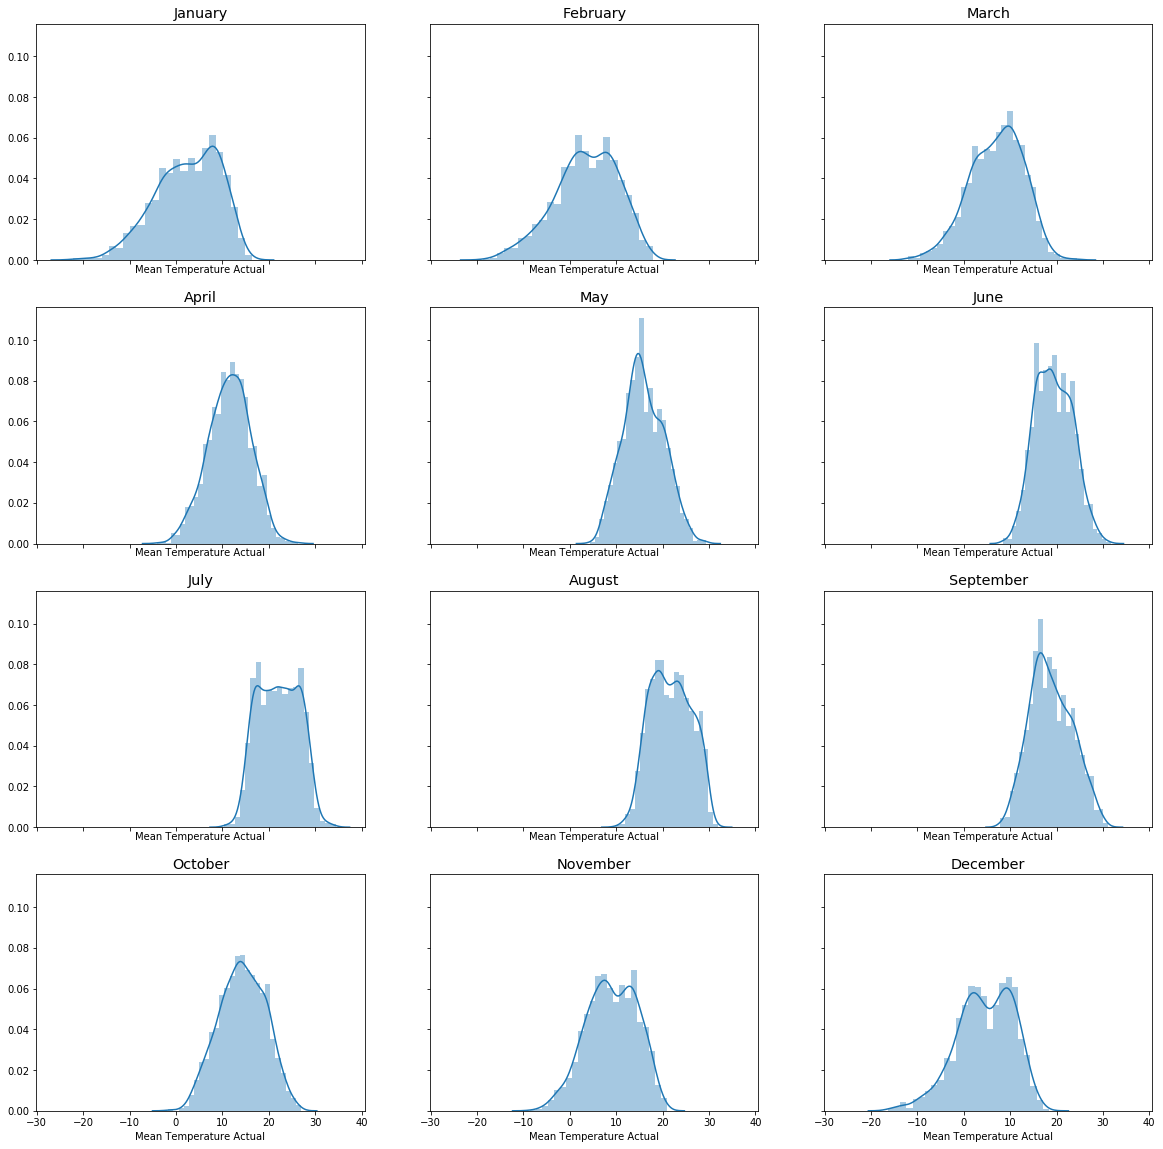

In [12]:
# assumes (nrows x ncols) episodes
fig, axes = plt.subplots(nrows=4, ncols=3,
                         sharex=True, sharey=True,
                         figsize=(20,20)
                        )

plt.rcParams.update({'font.size': 12})

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for month_i, ax in enumerate(axes.flatten()):
    
    subset = df[df.index.month == month_i+1]

    sns.distplot(subset['Mean Temperature Actual'], kde=True, ax=ax)
    ax.set_title(months[month_i])
    
# Save the full figure...
fig.savefig('./plots/monthly_temperatures.png')